In [1]:
# This imports librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# This loads the dataset
cleanedgames = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleanedgames.csv')
cleanedgames

,Rank,Name,Platform,Year,Genre,Publisher,NASales,EUSales,JPSales,OtherSales,GlobalSales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16590,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16591,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16592,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16593,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
# This Prints number of rows and columns in the dataset
print(cleanedgames.shape)

(16595, 11)


In [5]:
# This Shows the first 5 rows of the dataset
print(cleanedgames.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NASales  EUSales  JPSales  OtherSales  GlobalSales  
0    41.49    29.02     3.77        8.46        82.74  
1    29.08     3.58     6.81        0.77        40.24  
2    15.85    12.88     3.79        3.31        35.82  
3    15.75    11.01     3.28        2.96        33.00  
4    11.27     8.89    10.22        1.00        31.37  


In [6]:
# This fills in the missing values with N/A
cleanedgames.fillna('N/A', inplace=True)
cleanedgames

,Rank,Name,Platform,Year,Genre,Publisher,NASales,EUSales,JPSales,OtherSales,GlobalSales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16590,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16591,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16592,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16593,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# This loads the dataset
cleanedgames = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleanedgames.csv')


cleanedgames['TotalRegionalSales'] = cleanedgames[['NASales', 'EUSales', 'JPSales', 'OtherSales']].sum(axis=1)

# This normalises numerical columns
num_cols = ['NASales', 'EUSales', 'JPSales', 'OtherSales', 'TotalRegionalSales', 'GlobalSales']
scaler = MinMaxScaler()
cleanedgames[num_cols] = scaler.fit_transform(cleanedgames[num_cols])

# This encodes categorical variables
cat_cols = ['Platform', 'Publisher']
cleanedgames = pd.get_dummies(cleanedgames, columns=cat_cols)

# This Saves the processed dataset
cleanedgames.to_csv('/content/drive/MyDrive/Colab Notebooks/processed_games.csv', index=False)

# This displays first 5 rows
cleanedgames.head()




,Rank,Name,Year,Genre,NASales,EUSales,JPSales,OtherSales,GlobalSales,TotalRegionalSales,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,Wii Sports,2006,Sports,1.000000,1.000000,0.368885,0.800378,1.000000,1.000000,...,False,False,False,False,False,False,False,False,False,False
1,2,Super Mario Bros.,1985,Platform,0.700892,0.123363,0.666341,0.072848,0.486281,0.486343,...,False,False,False,False,False,False,False,False,False,False
2,3,Mario Kart Wii,2008,Racing,0.382020,0.443832,0.370841,0.313150,0.432854,0.433043,...,False,False,False,False,False,False,False,False,False,False
3,4,Wii Sports Resort,2009,Sports,0.379610,0.379394,0.320939,0.280038,0.398767,0.398840,...,False,False,False,False,False,False,False,False,False,False
4,5,Pokemon Red/Pokemon Blue,1996,Role-Playing,0.271632,0.306340,1.000000,0.094607,0.379064,0.379260,...,False,False,False,False,False,False,False,False,False,False


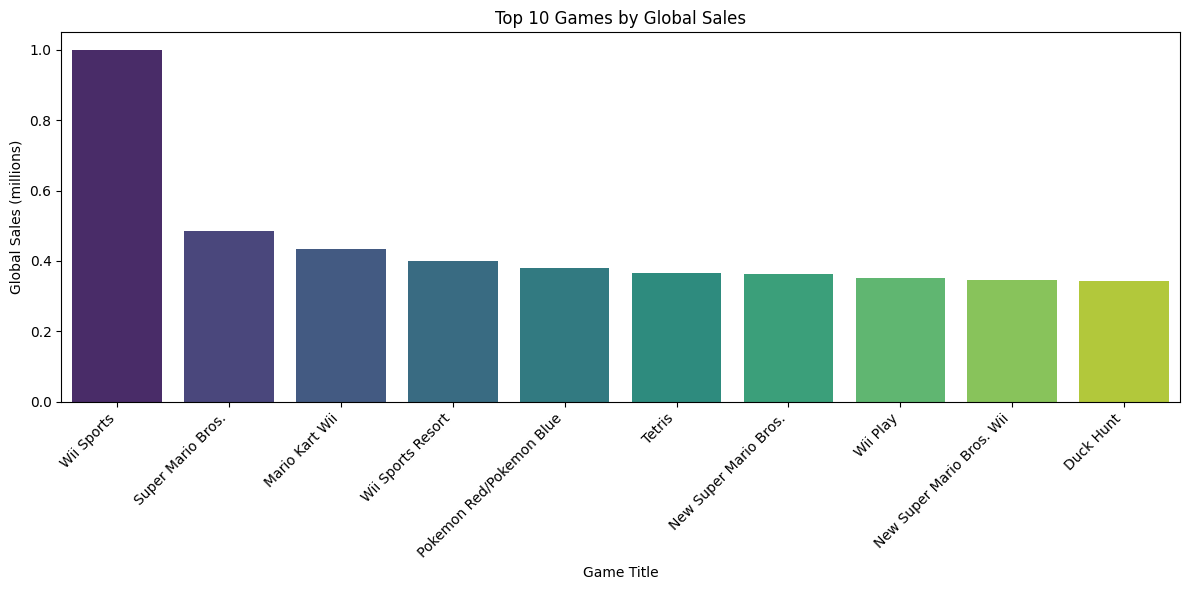

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# This Sorts and selects the top 10 by Global Sales
top10 = cleanedgames.sort_values(by='GlobalSales', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Name', y='GlobalSales', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Games by Global Sales')
plt.xlabel('Game Title')
plt.ylabel('Global Sales (millions)')
plt.tight_layout()
plt.show()


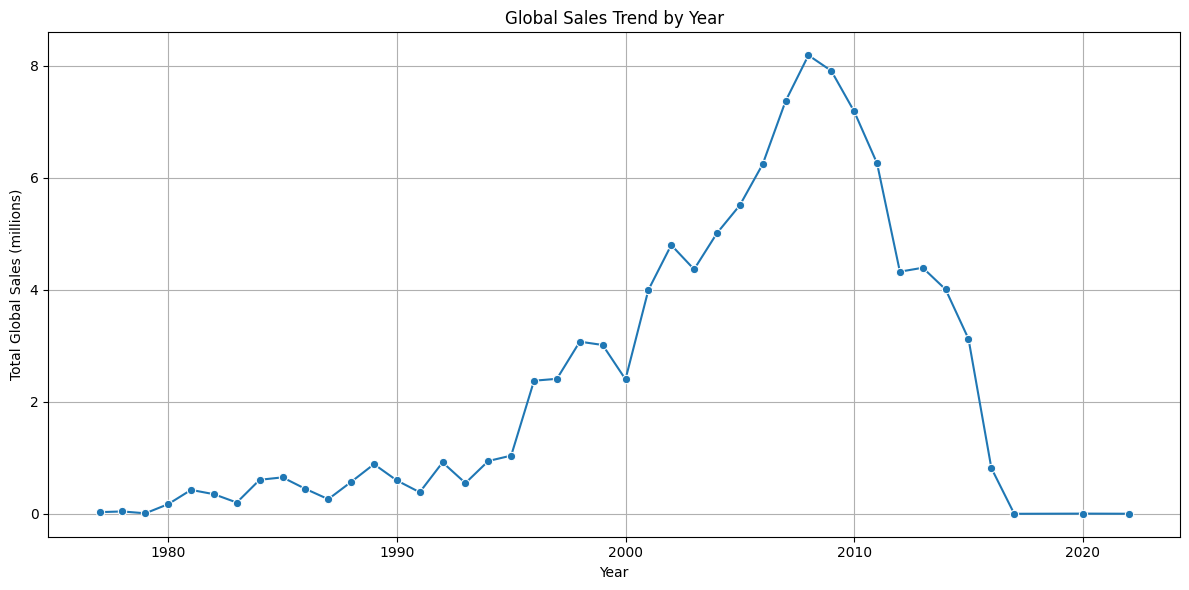

In [9]:
# This groups the Year and sum Global Sales
yearly_sales = cleanedgames.groupby('Year', as_index=False)['GlobalSales'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_sales, x='Year', y='GlobalSales', marker='o')
plt.title('Global Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()



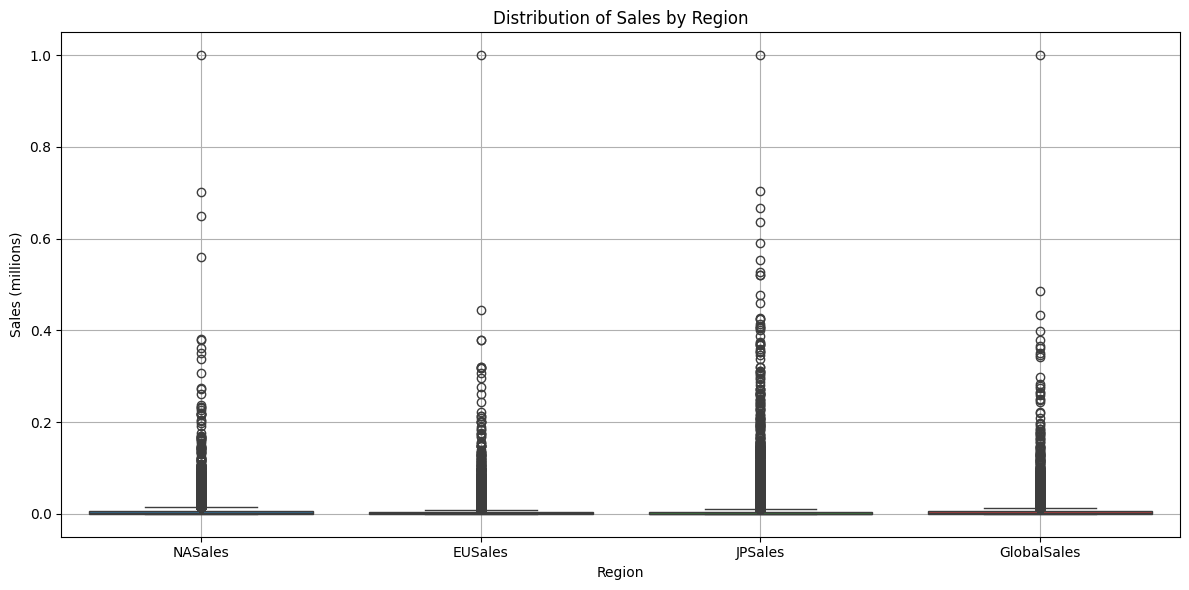

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=cleanedgames[['NASales', 'EUSales', 'JPSales', 'GlobalSales']])
plt.title('Distribution of Sales by Region')
plt.ylabel('Sales (millions)')
plt.xlabel('Region')
plt.grid(True)
plt.tight_layout()
plt.show()


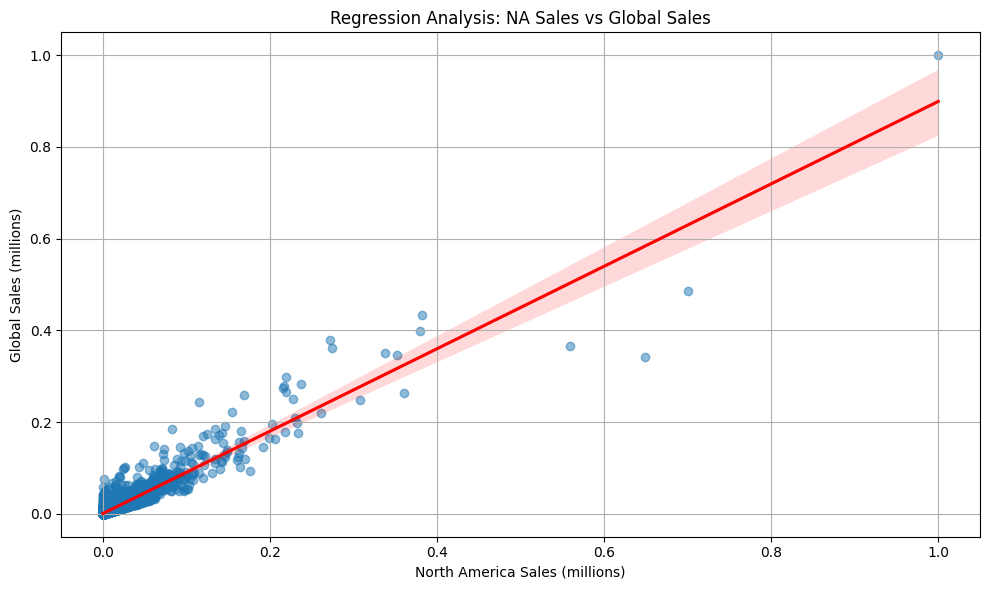

In [11]:
plt.figure(figsize=(10,6))

# This creates regression plot
sns.regplot(
    data=cleanedgames,
    x='NASales',
    y='GlobalSales',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

# This does the Plot styling
plt.title('Regression Analysis: NA Sales vs Global Sales')
plt.xlabel('North America Sales (millions)')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()



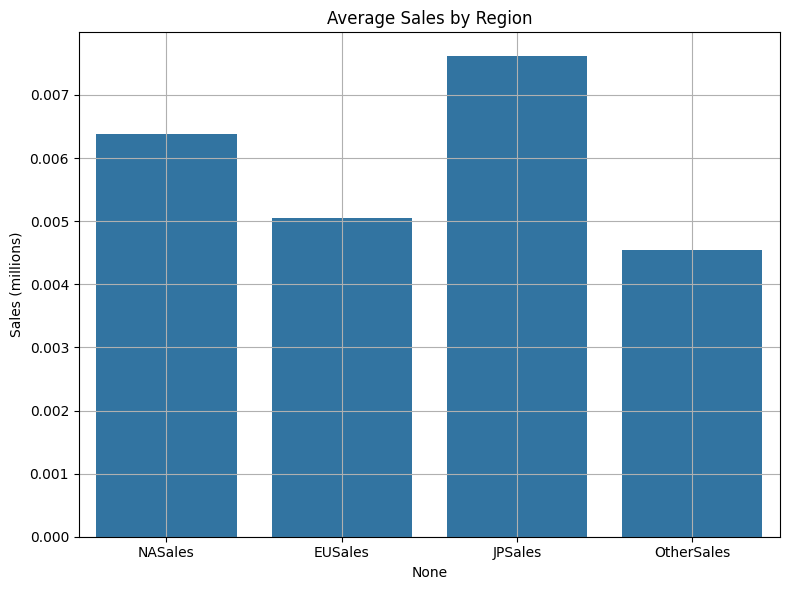

In [12]:
# This calculate and plots the average game sales for each region to compare regional performance visually
avg_sales = cleanedgames[['NASales', 'EUSales', 'JPSales', 'OtherSales']].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=avg_sales.index, y=avg_sales.values)
plt.title('Average Sales by Region')
plt.ylabel('Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


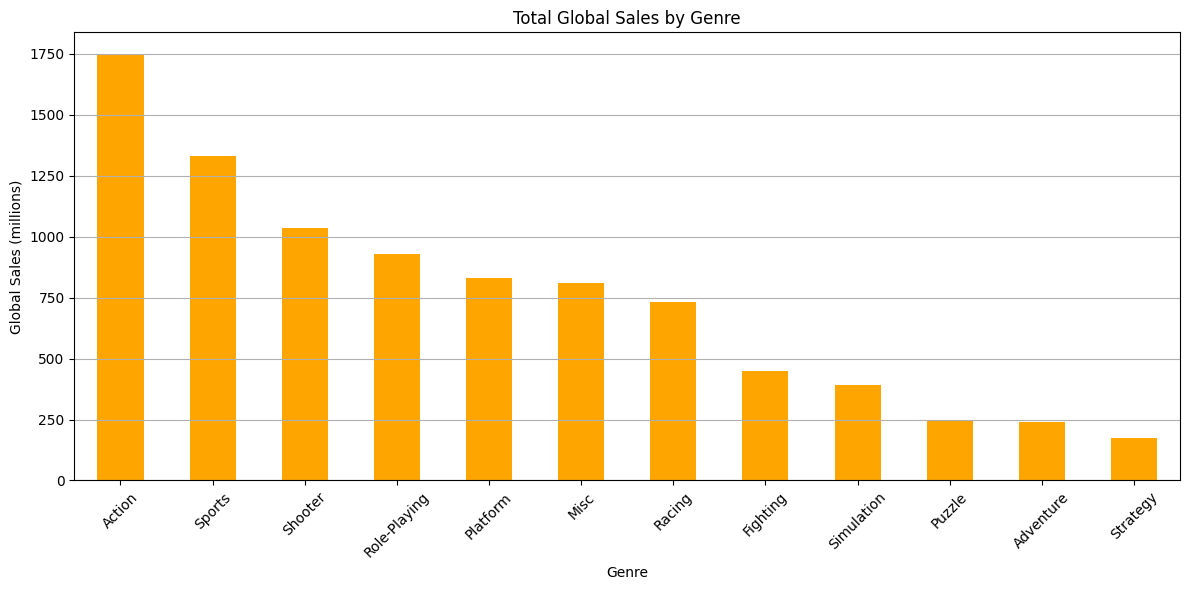

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# This load the dataset from Google Drive
cleanedgames = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleanedgames.csv')

# This groups the data by Genre and sum the GlobalSales
genre_sales = cleanedgames.groupby('Genre')['GlobalSales'].sum().sort_values(ascending=False)

# this creates a bar chart
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='orange')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

plt.show()



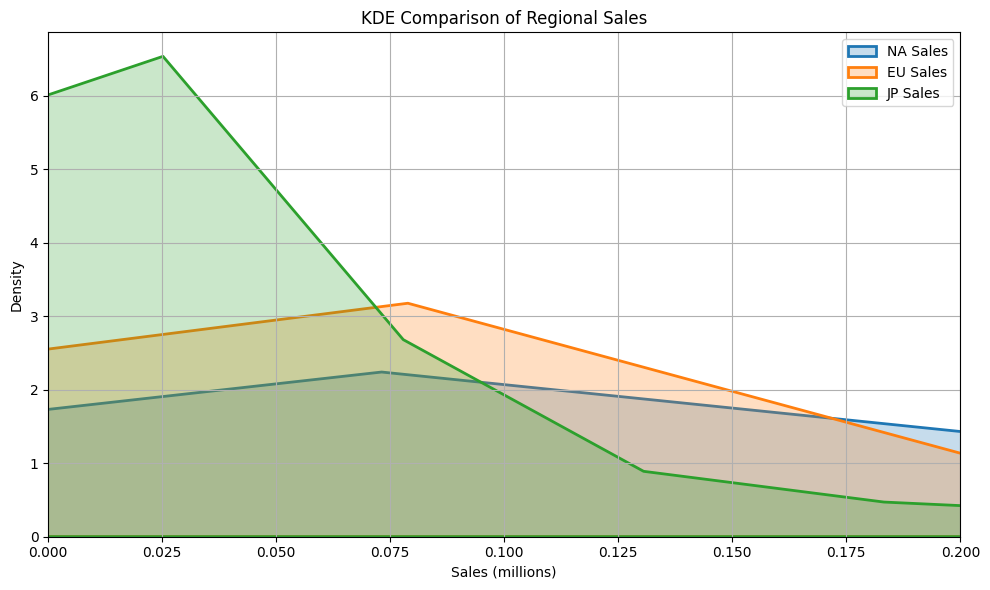

In [14]:
# This Plots KDE curves to compare the distribution of sales across North America, Europe, and Japan
plt.figure(figsize=(10,6))

sns.kdeplot(cleanedgames['NASales'], label='NA Sales', fill=True, linewidth=2)
sns.kdeplot(cleanedgames['EUSales'], label='EU Sales', fill=True, linewidth=2)
sns.kdeplot(cleanedgames['JPSales'], label='JP Sales', fill=True, linewidth=2)

plt.xlim(0, 0.2)
plt.title('KDE Comparison of Regional Sales')
plt.xlabel('Sales (millions)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


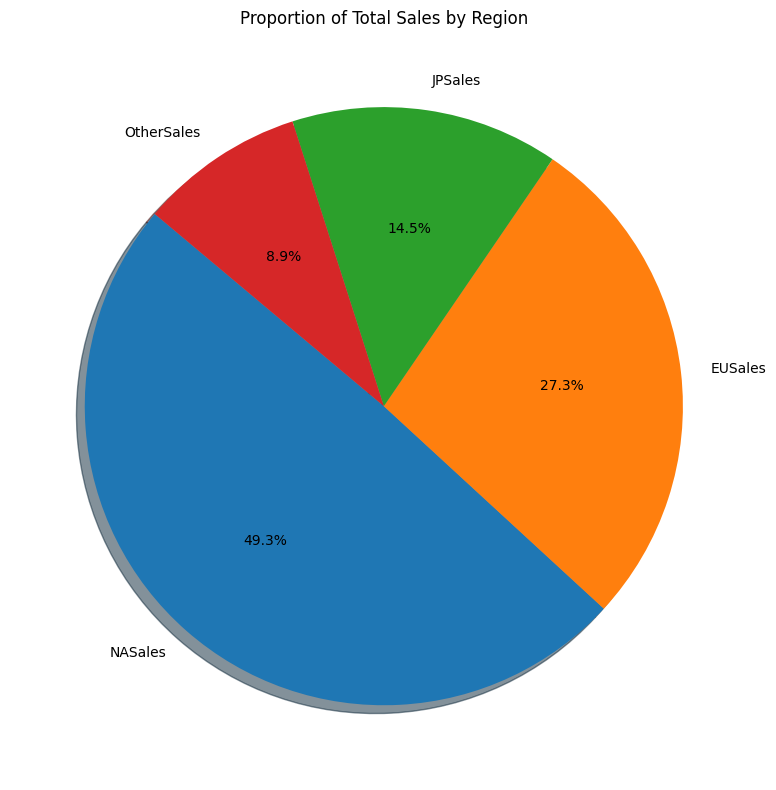

In [15]:
# this shows total sales by region
region_totals = cleanedgames[['NASales', 'EUSales', 'JPSales', 'OtherSales']].sum()

# this plots the pie chart
plt.figure(figsize=(8,8))
plt.pie(region_totals, labels=region_totals.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Proportion of Total Sales by Region')
plt.tight_layout()
plt.show()


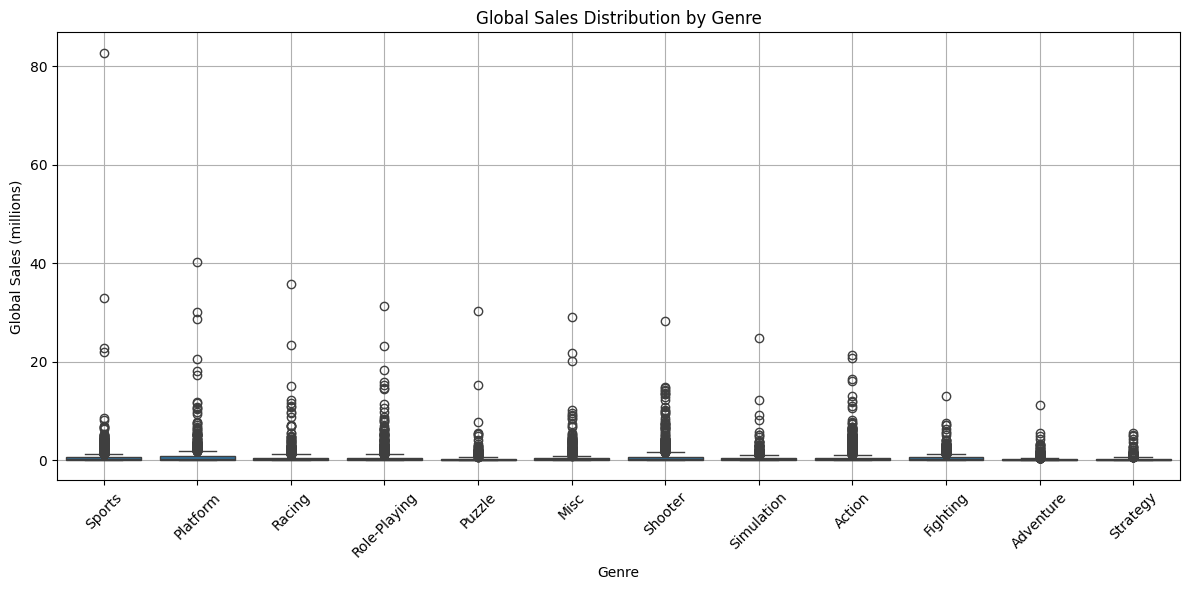

In [16]:
# This drops rows where either Genre or GlobalSales is missing
cleanedgames_boxplot = cleanedgames.dropna(subset=['Genre', 'GlobalSales'])


cleanedgames_boxplot = cleanedgames_boxplot[
    (cleanedgames_boxplot['GlobalSales'].apply(lambda x: isinstance(x, (int, float))))
]

# This Plots the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleanedgames_boxplot, x='Genre', y='GlobalSales')
plt.xticks(rotation=45)
plt.title('Global Sales Distribution by Genre')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()


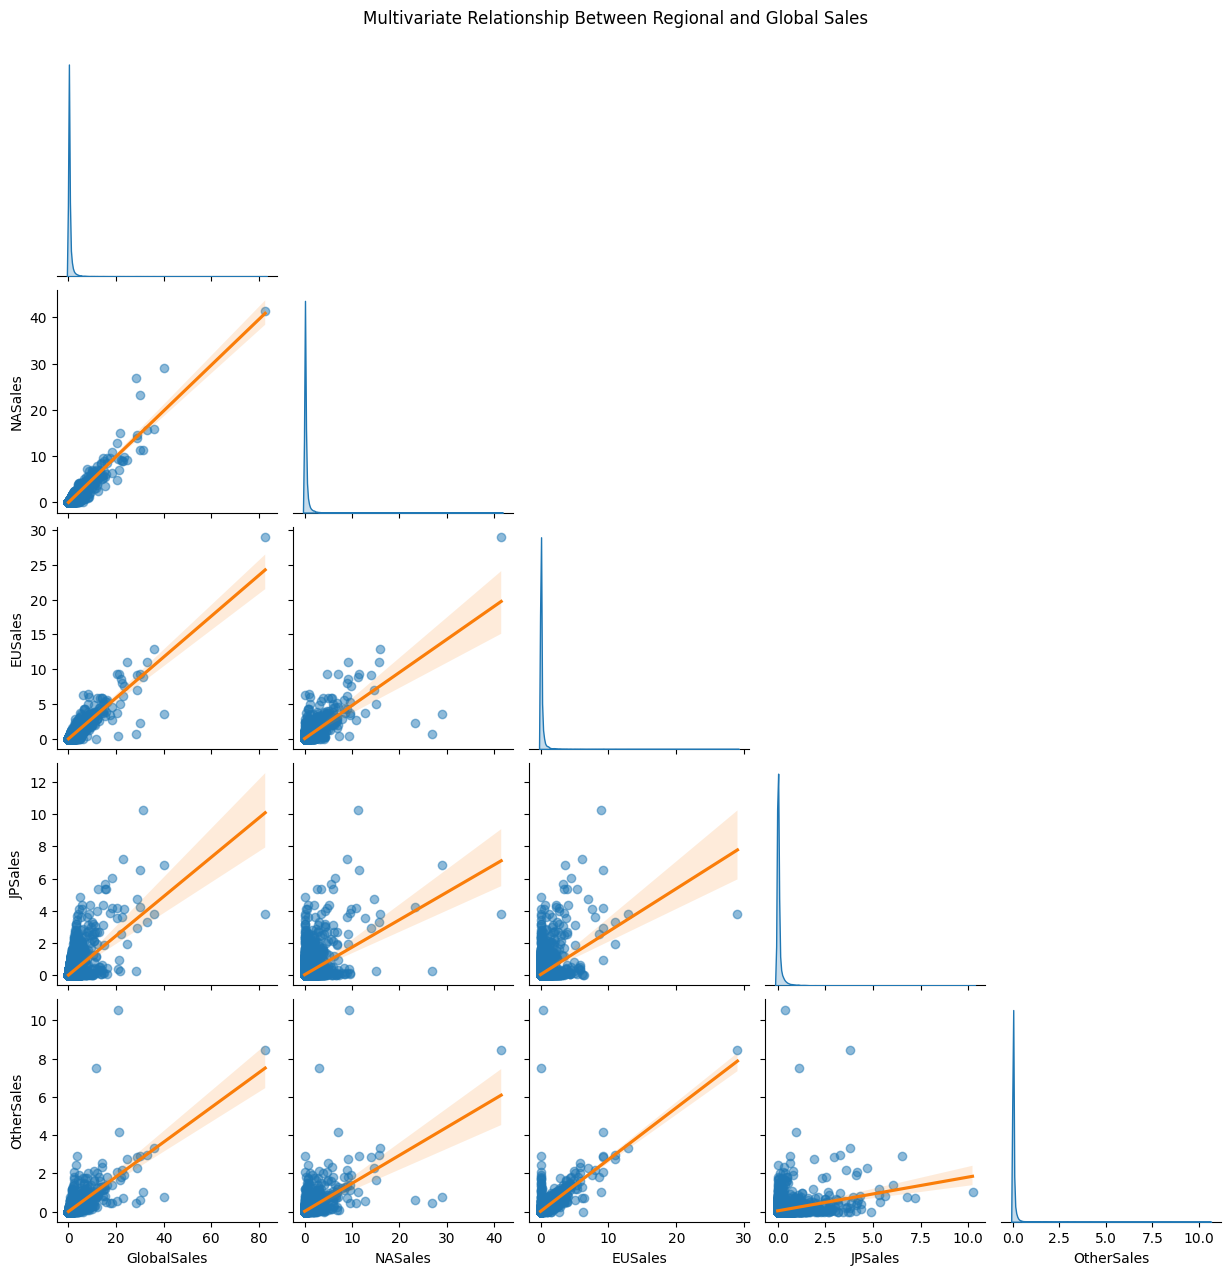

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# this picks numerical columns only
sales_numeric = cleanedgames[['GlobalSales', 'NASales', 'EUSales', 'JPSales', 'OtherSales']]

# this drop any rows with NaN
sales_numeric = sales_numeric.dropna()

#this uses pairplot to show relationships
sns.pairplot(
    sales_numeric,
    kind='reg',  # shows regression lines
    diag_kind='kde',
    plot_kws={'line_kws': {'color': '#fa7d09'}, 'scatter_kws': {'alpha': 0.5}},
    corner=True
)
plt.suptitle("Multivariate Relationship Between Regional and Global Sales", y=1.02)
plt.show()


Correlation Matrix:
              NASales   EUSales   JPSales  OtherSales  GlobalSales
NASales      1.000000  0.767725  0.449795    0.634743     0.941048
EUSales      0.767725  1.000000  0.435585    0.726386     0.902835
JPSales      0.449795  0.435585  1.000000    0.290180     0.611819
OtherSales   0.634743  0.726386  0.290180    1.000000     0.748333
GlobalSales  0.941048  0.902835  0.611819    0.748333     1.000000


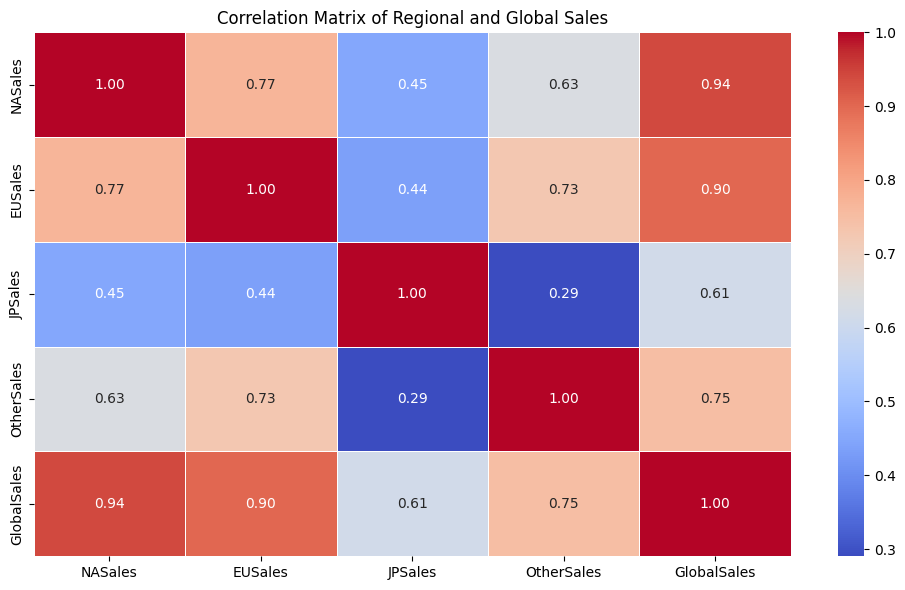

In [18]:
# this selects numeric sales-related columns
numeric_cols = ['NASales', 'EUSales', 'JPSales', 'OtherSales', 'GlobalSales']

# This creates correlation matrix
corr_matrix = cleanedgames[numeric_cols].corr()

# This displays the matrix
print("Correlation Matrix:")
print(corr_matrix)

# This Plots the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Regional and Global Sales')
plt.tight_layout()
plt.show()


In [19]:
# This prepares the data for modeling by separating features (X) from the target variable (Genre)
X = cleanedgames.drop('Genre', axis=1)
y = cleanedgames['Genre']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cleanedgames['Genre'] = le.fit_transform(cleanedgames['Genre'])


In [22]:
# This encodes all non-numeric columns
cleanedgames_encoded = pd.get_dummies(cleanedgames.drop('Genre', axis=1))

# This adds back the numeric target
cleanedgames_encoded['Genre'] = cleanedgames['Genre']


In [23]:
# This splits into features and target
X = cleanedgames_encoded.drop('Genre', axis=1)
y = cleanedgames_encoded['Genre']

# This uses train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# This uses GlobalSales as the target
y = cleanedgames_encoded['GlobalSales']
X = cleanedgames_encoded.drop('GlobalSales', axis=1)

# This splits the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# This trains a regression model
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

# This predicts
y_pred = reg.predict(X_test)

# This evaluate the model
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 0.44492960433822054
Mean Absolute Error (MAE): 0.012249447680257337
R² Score: 0.8612477822328367


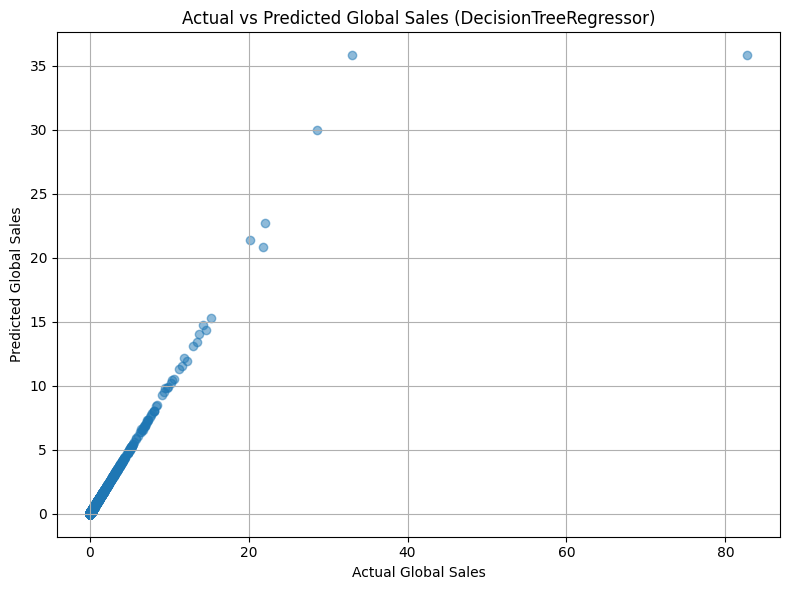

In [25]:

# This plots Actual vs Predicted Global Sales
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales (DecisionTreeRegressor)")
plt.grid(True)
plt.tight_layout()
plt.show()
